In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Load data

In [3]:
df = pd.read_csv('Data/Agrofood_co2_emission.csv',sep=',')
print(df)

             Area  Year  Savanna fires  Forest fires  Crop Residues  \
0     Afghanistan  1990        14.7237        0.0557       205.6077   
1     Afghanistan  1991        14.7237        0.0557       209.4971   
2     Afghanistan  1992        14.7237        0.0557       196.5341   
3     Afghanistan  1993        14.7237        0.0557       230.8175   
4     Afghanistan  1994        14.7237        0.0557       242.0494   
...           ...   ...            ...           ...            ...   
6960     Zimbabwe  2016      1190.0089      232.5068        70.9451   
6961     Zimbabwe  2017      1431.1407      131.1324       108.6262   
6962     Zimbabwe  2018      1557.5830      221.6222       109.9835   
6963     Zimbabwe  2019      1591.6049      171.0262        45.4574   
6964     Zimbabwe  2020       481.9027       48.4197       108.3022   

      Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0             686.0000                          0.0               

## Line plot

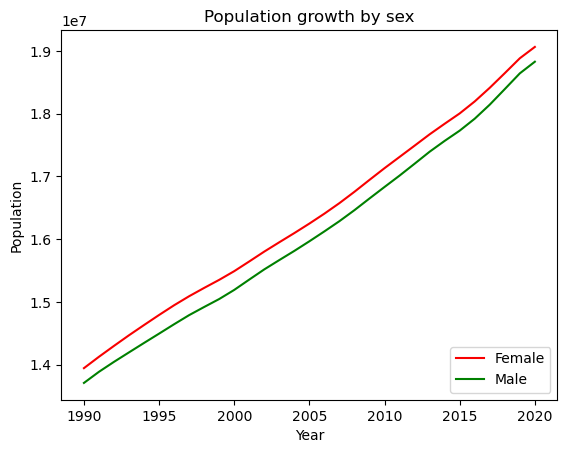

In [56]:
# get just the canadian data
can_df = df[df['Area'] == 'Canada']

# lets plot 'Total Population - Female' over time
fig, ax = plt.subplots()
ax.plot(can_df['Year'],can_df['Total Population - Female'],label='Female',color='#f80000')
ax.plot(can_df['Year'],can_df['Total Population - Male'],label='Male',color='green')
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.set_title('Population growth by sex')
ax.legend(loc='lower right')
plt.show()


## Histogram

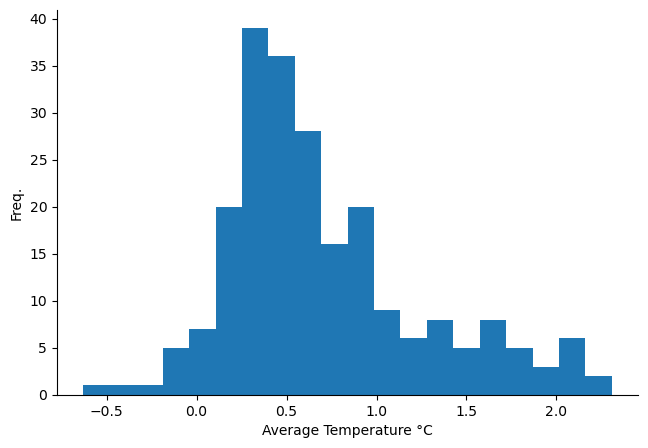

In [30]:
# distributions of average Temperatures in 2000
df_2k = df[df['Year'] == 2000]


fig, ax = plt.subplots()
fig.set_size_inches(7.5, 5)

ax.hist(df_2k['Average Temperature °C'],bins=20)
ax.set_xlabel('Average Temperature °C')
ax.set_ylabel('Freq.')
# remove borders
ax.spines[['right', 'top']].set_visible(False)
plt.savefig('hist.png',dpi=300)
plt.show()


## Box plot

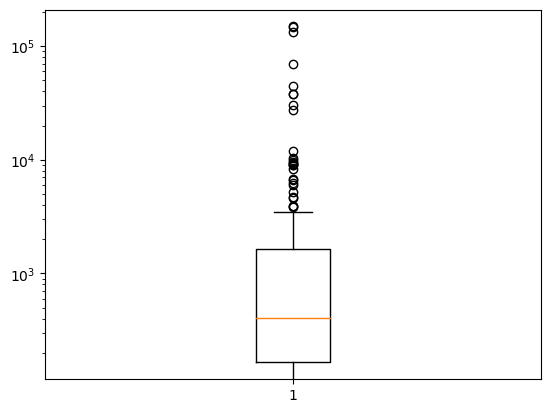

In [32]:
df_2k
fig, ax = plt.subplots()
ax.boxplot(df_2k['Rice Cultivation'])
ax.set_yscale('log')
plt.show()

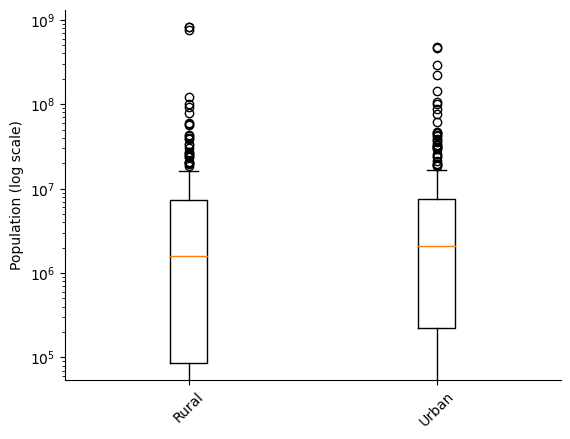

In [47]:
df_2k
fig, ax = plt.subplots()
ax.boxplot([df_2k['Rural population'],df_2k['Urban population']])
ax.set_xticks([1,2])
ax.set_xticklabels(['Rural','Urban'],rotation=45)
ax.set_ylabel('Population (log scale)')
ax.set_yscale('log')
ax.spines[['right', 'top']].set_visible(False)
plt.show()

## Multi panel plots

(2,)


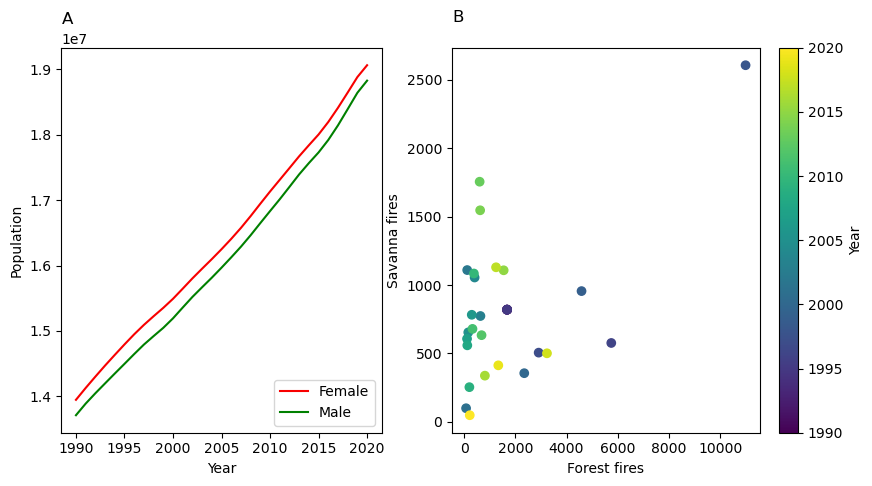

In [77]:
fig, axes = plt.subplots(1,2,width_ratios=[1,1.2])
fig.set_size_inches(10, 5)
print(axes.shape)
axes[0].plot(can_df['Year'],can_df['Total Population - Female'],label='Female',color='#f80000')
axes[0].plot(can_df['Year'],can_df['Total Population - Male'],label='Male',color='green')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Population')
axes[0].legend(loc='lower right')
axes[0].set_title('A',loc='left')

sc = axes[1].scatter(can_df['Forest fires'],can_df['Savanna fires'],c=can_df['Year'])
axes[1].set_xlabel('Forest fires')
axes[1].set_ylabel('Savanna fires')
axes[1].set_title('B\n',loc='left')

fig.colorbar(sc,label='Year',ax=axes[1])

plt.show()

## Huge scatter plot with histograms

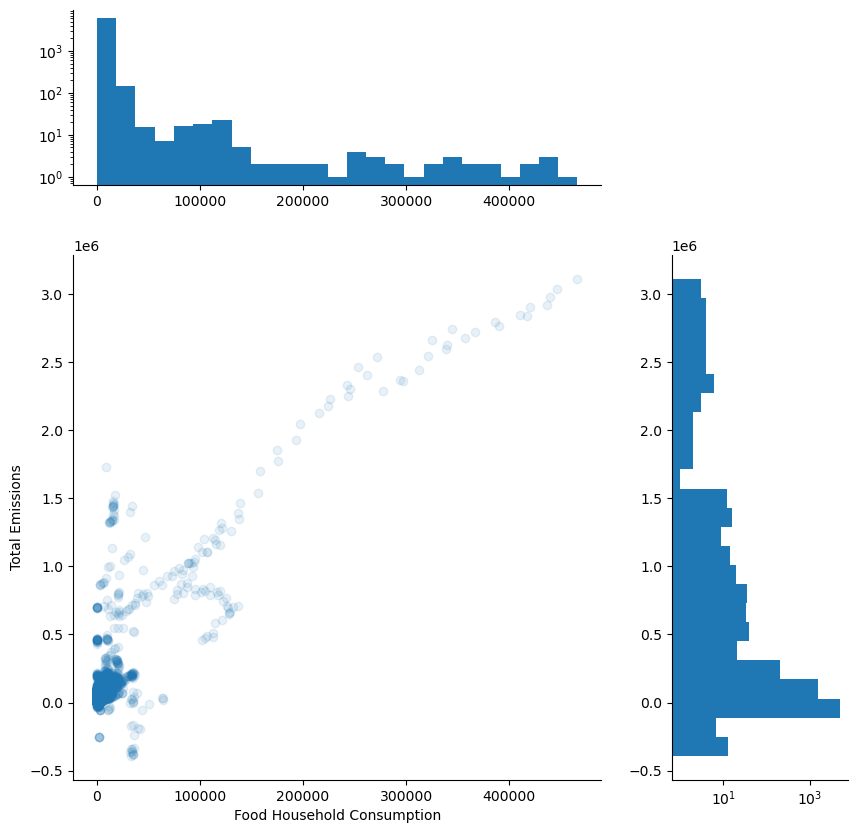

In [99]:
df.columns
'total_emission'
'Food Household Consumption'

fig, axes = plt.subplots(2,2,width_ratios=[3,1],height_ratios=[1,3])
fig.set_size_inches(10, 10)

axes[1,0].scatter(df['Food Household Consumption'],df['total_emission'],alpha=.1)
axes[1,0].set_xlabel('Food Household Consumption')
axes[1,0].set_ylabel('Total Emissions')
axes[1,0].spines[['right', 'top']].set_visible(False)

axes[0,0].hist(df['Food Household Consumption'],bins=25)
axes[0,0].set_yscale('log')
axes[0,0].spines[['right', 'top']].set_visible(False)

axes[1,1].hist(df['total_emission'],orientation='horizontal',bins=25)
axes[1,1].set_xscale('log')
axes[1,1].spines[['right', 'top']].set_visible(False)

axes[0,1].set_axis_off()

plt.savefig('beautiful_plot.png',dpi=300)
plt.show()